In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

653

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la ronge
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | potgietersrus
City not found. Skipping...
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | kloulklubed
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | lianzhou
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | longonjo
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | namatanai
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | san jeronimo
Processing Record 20 of Set 1 | port antonio
Processing Record 21 of Set 1 | nemuro
Processing Reco

Processing Record 36 of Set 4 | borzya
Processing Record 37 of Set 4 | varzea da palma
Processing Record 38 of Set 4 | bosobolo
Processing Record 39 of Set 4 | fort saint james
Processing Record 40 of Set 4 | grand centre
City not found. Skipping...
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | temaraia
City not found. Skipping...
Processing Record 43 of Set 4 | vilyuysk
Processing Record 44 of Set 4 | faya
Processing Record 45 of Set 4 | palhi
Processing Record 46 of Set 4 | hay river
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | necochea
Processing Record 49 of Set 4 | swellendam
Processing Record 50 of Set 4 | qasigiannguit
Processing Record 1 of Set 5 | yaan
Processing Record 2 of Set 5 | finschhafen
Processing Record 3 of Set 5 | samarai
Processing Record 4 of Set 5 | valparaiso
Processing Record 5 of Set 5 | namibe
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | marion
Processing Record 8 of Set 5 |

Processing Record 21 of Set 8 | biloela
Processing Record 22 of Set 8 | gimli
Processing Record 23 of Set 8 | cedartown
Processing Record 24 of Set 8 | henties bay
Processing Record 25 of Set 8 | pinhao
Processing Record 26 of Set 8 | dauphin
Processing Record 27 of Set 8 | sobolevo
Processing Record 28 of Set 8 | kudahuvadhoo
Processing Record 29 of Set 8 | sisimiut
Processing Record 30 of Set 8 | davydivka
Processing Record 31 of Set 8 | ishigaki
Processing Record 32 of Set 8 | ambagarh chauki
Processing Record 33 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 34 of Set 8 | acarau
Processing Record 35 of Set 8 | treinta y tres
Processing Record 36 of Set 8 | cruzeiro do sul
Processing Record 37 of Set 8 | podosinovets
Processing Record 38 of Set 8 | olean
Processing Record 39 of Set 8 | korem
Processing Record 40 of Set 8 | korla
Processing Record 41 of Set 8 | lowestoft
Processing Record 42 of Set 8 | olafsvik
Processing Record 43 of Set 8 | hatsukaichi

Processing Record 9 of Set 12 | pathardi
Processing Record 10 of Set 12 | picota
Processing Record 11 of Set 12 | viseu
Processing Record 12 of Set 12 | uivar
Processing Record 13 of Set 12 | blytheville
Processing Record 14 of Set 12 | labe
Processing Record 15 of Set 12 | pitimbu
Processing Record 16 of Set 12 | luau
Processing Record 17 of Set 12 | paamiut
Processing Record 18 of Set 12 | launceston
Processing Record 19 of Set 12 | la union
Processing Record 20 of Set 12 | santiago del estero
Processing Record 21 of Set 12 | sao filipe
Processing Record 22 of Set 12 | mount isa
Processing Record 23 of Set 12 | lavrentiya
Processing Record 24 of Set 12 | yovon
Processing Record 25 of Set 12 | sidi ali
Processing Record 26 of Set 12 | latung
Processing Record 27 of Set 12 | bilma
Processing Record 28 of Set 12 | bonavista
Processing Record 29 of Set 12 | bonoua
Processing Record 30 of Set 12 | shumyachi
Processing Record 31 of Set 12 | mnogovershinnyy
Processing Record 32 of Set 12 | 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,La Ronge,55.1001,-105.2842,57.45,62,90,14.97,CA,2021-07-17 21:16:36
1,Barrow,71.2906,-156.7887,53.62,93,90,17.27,US,2021-07-17 21:16:36
2,Hermanus,-34.4187,19.2345,53.91,90,6,9.28,ZA,2021-07-17 21:16:37
3,Kloulklubed,7.0419,134.2556,77.50,77,100,5.70,PW,2021-07-17 21:16:37
4,Vaini,-21.2000,-175.2000,77.16,88,75,8.05,TO,2021-07-17 21:16:37
5,Pacific Grove,36.6177,-121.9166,91.56,81,40,10.00,US,2021-07-17 21:16:38
6,Lianzhou,24.7811,112.3825,74.91,98,99,2.33,CN,2021-07-17 21:16:38
7,Cape Town,-33.9258,18.4232,56.10,96,0,1.99,ZA,2021-07-17 21:16:38
8,Longonjo,-12.9067,15.2533,62.98,37,14,1.43,AO,2021-07-17 21:16:38
9,Tasiilaq,65.6145,-37.6368,44.76,70,100,6.22,GL,2021-07-17 21:16:39


In [11]:
# Change the column order. 
new_column_order = ["City", "Country", "Date", "Lat","Lng",
                    "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,La Ronge,CA,2021-07-17 21:16:36,55.1001,-105.2842,57.45,62,90,14.97
1,Barrow,US,2021-07-17 21:16:36,71.2906,-156.7887,53.62,93,90,17.27
2,Hermanus,ZA,2021-07-17 21:16:37,-34.4187,19.2345,53.91,90,6,9.28
3,Kloulklubed,PW,2021-07-17 21:16:37,7.0419,134.2556,77.50,77,100,5.70
4,Vaini,TO,2021-07-17 21:16:37,-21.2000,-175.2000,77.16,88,75,8.05
5,Pacific Grove,US,2021-07-17 21:16:38,36.6177,-121.9166,91.56,81,40,10.00
6,Lianzhou,CN,2021-07-17 21:16:38,24.7811,112.3825,74.91,98,99,2.33
7,Cape Town,ZA,2021-07-17 21:16:38,-33.9258,18.4232,56.10,96,0,1.99
8,Longonjo,AO,2021-07-17 21:16:38,-12.9067,15.2533,62.98,37,14,1.43
9,Tasiilaq,GL,2021-07-17 21:16:39,65.6145,-37.6368,44.76,70,100,6.22


In [12]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

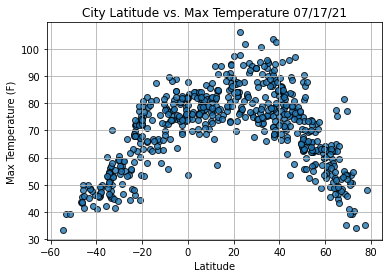

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

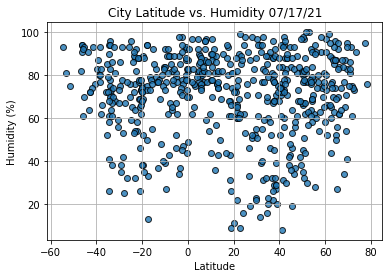

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot.
plt.show()

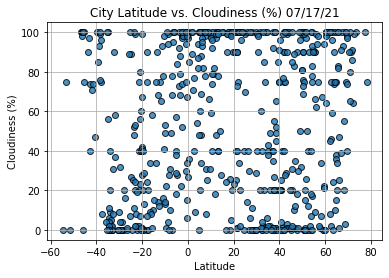

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig3.png")

# Show plot.
plt.show()

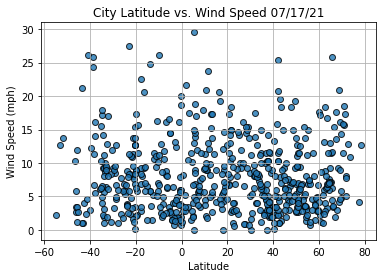

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

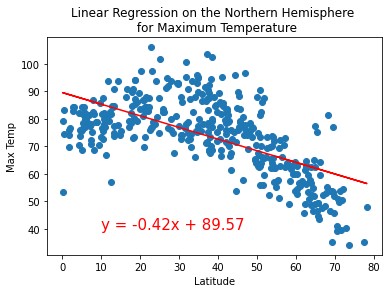

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

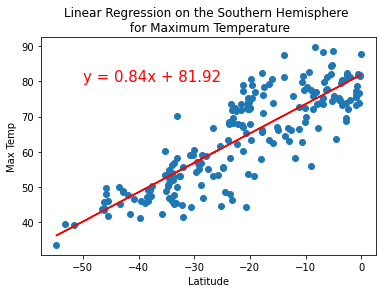

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,80))

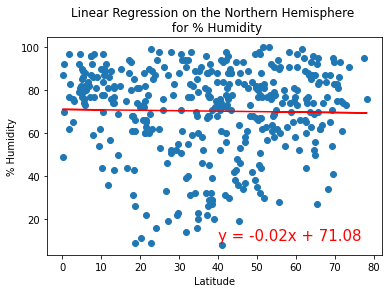

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',(40,10))

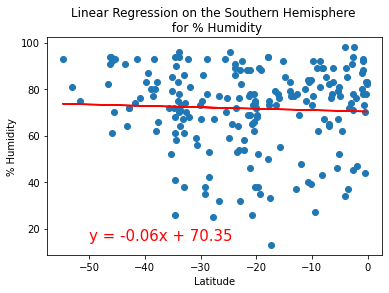

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,15))

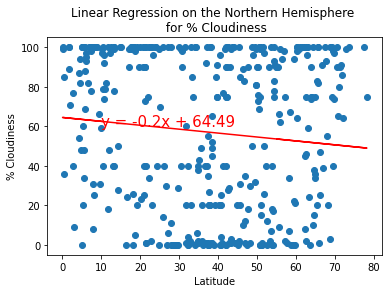

In [24]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(10,60))

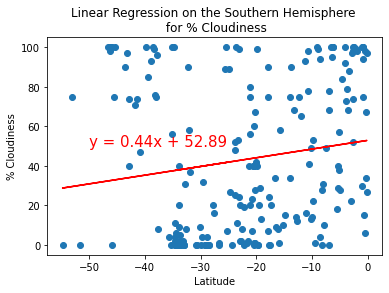

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-50,50))

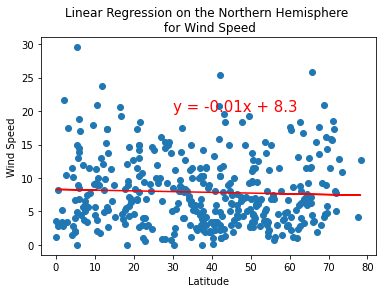

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',(30,20))

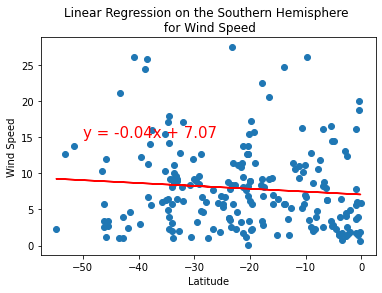

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(-50,15))